## Kernel PCA
#### Team members: Liule Yang, Zhiwen Xu, Yuxuan Liu

## Background and motivation

Principal component analysis (PCA) is one of the most popular dimensionality reduction and data visualization right now (Bishop, 561). PCA can extract linear features of a matrix input data and some meaningful analysis can be performed based on that. PCA can be performed through eigen-decomposition as well as singular value decomposition (SVD). PCA works well in some cases, for example, when dealing with DNA sequences, it can achieve satisfactory results.

However, PCA can only extract linear features. When the data is not linearly separable, we need to do a kernel trick and here we need kernel PCA (KPCA). With the KPCA, we can extract nonlinear features. Common kernels for KPCA include polynomial kernel, Gaussian kernel, and Laplace kernel.

## Theory

## Implementation

Gaussian radial basis function (RBF) Kernel PCA

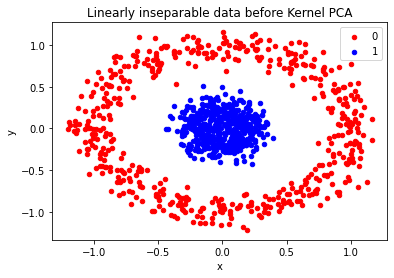

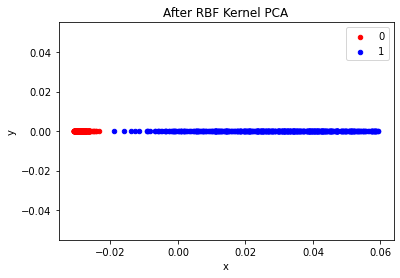

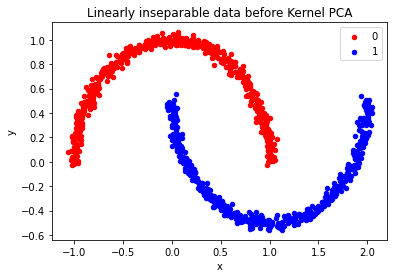

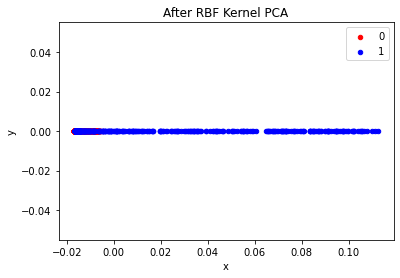

In [167]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
from numpy import exp
import numpy as np


def gaussian_kpca(X, gamma, n_components):
    # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n @ K - K @ one_n + one_n @ K @ one_n

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = []
    for i in range(1,n_components+1):
      for x in eigvecs[:,-i]:
        X_pc.append([x])
    return np.array(X_pc)


def poly_kpca(X, p, n_components):

    products = []
    for i in range(0,len(X)-1):
      for j in range(i+1,len(X)):
        products.append(X[i] @ X[j])
    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_products = squareform(products)

    # Computing the MxM kernel matrix.
    K = pow(1 + mat_sq_products, p)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n @ K - K @ one_n + one_n @ K @ one_n

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = []
    for i in range(1,n_components+1):
      for x in eigvecs[:,-i]:
        X_pc.append([x])
    return np.array(X_pc)

def poly_kpca(X, p, n_components):

    products = []
    for i in range(0,len(X)-1):
      for j in range(i+1,len(X)):
        products.append(X[i] @ X[j])
    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_products = squareform(products)

    # Computing the MxM kernel matrix.
    K = pow(1 + mat_sq_products, p)

    # Centering the symmetric NxN kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n @ K - K @ one_n + one_n @ K @ one_n

    # Obtaining eigenvalues in descending order with corresponding
    # eigenvectors from the symmetric matrix.
    eigvals, eigvecs = eigh(K)

    # Obtaining the i eigenvectors that corresponds to the i highest eigenvalues.
    X_pc = []
    for i in range(1,n_components+1):
      for x in eigvecs[:,-i]:
        X_pc.append([x])
    return np.array(X_pc)

def show_data_gaussian(gamma_param):
  # generate 2d classification dataset
  X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2)
  # scatter plot, dots colored by class value
  df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
  fig, ax = pyplot.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color = 'blue' if key == 1 else 'red')
  pyplot.title('Linearly inseparable data before Kernel PCA')
  pyplot.show()

  X_pc = gaussian_kpca(X, gamma=gamma_param, n_components=1)
  temp = []
  for x in X_pc:
    temp.append(x[0])
  df = DataFrame(dict(x=temp, y=np.zeros(len(X_pc)), label=y))
  fig, ax = pyplot.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color = 'blue' if key == 1 else 'red')
  pyplot.title('After Gaussian RBF Kernel PCA')
  pyplot.show()

def show_data_polynomial(p_param):
  # generate 2d classification dataset
  X, y = make_moons(n_samples=1000, noise=0.03)
  # scatter plot, dots colored by class value
  df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
  fig, ax = pyplot.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color = 'blue' if key == 1 else 'red')
  pyplot.title('Linearly inseparable data before Kernel PCA')
  pyplot.show()

  X_pc = poly_kpca(X, p=p_param, n_components=1)
  temp = []
  for x in X_pc:
    temp.append(x[0])
  df = DataFrame(dict(x=temp, y=np.zeros(len(X_pc)), label=y))
  fig, ax = pyplot.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color = 'blue' if key == 1 else 'red')
  pyplot.title('After Polynomial Kernel PCA')
  pyplot.show()

def show_data_sigma(s_param):
  # generate 2d classification dataset
  X, y = make_moons(n_samples=1000, noise=0.03)
  # scatter plot, dots colored by class value
  df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
  fig, ax = pyplot.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color = 'blue' if key == 1 else 'red')
  pyplot.title('Linearly inseparable data before Kernel PCA')
  pyplot.show()

  X_pc = poly_kpca(X, p=p_param, n_components=1)
  temp = []
  for x in X_pc:
    temp.append(x[0])
  df = DataFrame(dict(x=temp, y=np.zeros(len(X_pc)), label=y))
  fig, ax = pyplot.subplots()
  grouped = df.groupby('label')
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color = 'blue' if key == 1 else 'red')
  pyplot.title('After Polynomial Kernel PCA')
  pyplot.show()

show_data_gaussian(gamma_param = 15)
show_data_polynomial(p_param = 5)
show_data_sigmoid(sigma_param = 15)



#### The eigen decomposition implementation of PCA

The first type of algorithm is utilizing the information from eigenvalues and eigenvectors. First, the input matrix will be standardized by deducting mean of the matrix. Then, the covariance matrix of the input matrix will be computed, and the eigenvector and eigenvalue will be computed based on the covariance matrix. Then, sort the eigenvectors based on eigenvalues from large to small, and then select the top n components to make transformation of the original input matrix to a matrix with n features (n columns).

In [ ]:
def eigen_pca(m, n_components = 2):
    # compute the mean and standarize the input matrix
    mean = np.mean(m,0)
    centered_m = m - mean
    num_rows, num_cols = centered_m.shape
    # compute covariance matrix
    cov_matrix = np.cov(np.transpose(centered_m))
    # compute eigenvector and eigenvalue
    eig_val_cov, eig_vec_cov = np.linalg.eig(cov_matrix)
    # sort the eigenvalue and eigenvector pair by the order of eigenvector from large to small
    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    # transform to the reduced dimension
    matrix_w = np.hstack((eig_pairs[k][1].reshape(num_cols,1) for k in range(n_components)))
    transformed = matrix_w.T.dot(centered_m.transpose())
    return transformed

#### The SVD implementation of PCA

The PCA can also be performed using SVD. The only difference is that we are using sigular value this time instead of eigenvalues.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def svd_pca(m):
    # compute the mean and standarize the input matrix
    mean = np.mean(m,0)
    centered_m = m - mean
    num_rows, num_cols = centered_m.shape
    # compute covariance matrix
    cov_matrix = np.cov(np.transpose(centered_m))
    # compute eigenvector and eigenvalue
    eig_val_cov, eig_vec_cov = np.linalg.eig(cov_matrix)
    # sort the eigenvalue and eigenvector pair by the order of eigenvector from large to small
    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    # transform to the reduced dimension
    matrix_w = np.hstack((eig_pairs[k][1].reshape(num_cols,1) for k in range(n_components)))
    transformed = matrix_w.T.dot(centered_m.transpose())
    return transformed


## Data

## References